In [17]:
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
import modin.pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
os.getcwd()

'/Users/marcin/Documents/KBase/KE/KE_KG/src/embeddings'

In [3]:
df_taxa_orig = pd.read_csv("../../../MGnify/taxonomy_aggregated_full_removed_duplicates_10000.tsv", sep="\t")

In [18]:
cols = [col for col in df_taxa_orig.columns if col not in ['id', 'study_id', 'sample_id', 'biome', 'exptype']]
#df_taxa = df_taxa_orig[df_taxa_orig.columns.difference(['id', 'study_id', 'sample_id', 'biome', 'exp_type'])]
df_taxa = df_taxa_orig[cols]   
df_taxa.shape

(9999, 68509)

In [13]:
df_taxa.columns

Index(['sk__Eukaryota;k__Metazoa;p__Nemertea;c__Anopla;o__Heteronemertea;f__Lineidae;g__Zygeupolia;s__Zygeupolia_rubens',
       'sk__Eukaryota;k__;p__;c__Colpodea;o__Bryophryida',
       'sk__Bacteria;k__;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__Pseudomonas_reactans',
       'sk__Eukaryota;k__;p__;c__Labyrinthulomycetes;o__;f__Thraustochytriaceae;g__Aplanochytrium;s__Aplanochytrium_sp._SEK_603',
       'sk__Bacteria;k__;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Proteinivoraceae;g__Anaerobranca',
       'sk__Bacteria;k__;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Oceanicola;s__Oceanicola_sp._HL-35',
       'sk__Bacteria;k__;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus;s__Bacillus_sp._1087',
       'sk__Bacteria;k__;p__;c__;o__;f__;g__;s__denitrifying_bacterium_enrichment_culture_clone_NOA_0_E5',
       'sk__Eukaryota;k__Metazoa;p__Nematoda;c__Chromadorea;o__Rhabdi

In [14]:
df_taxa_colsums = df_taxa.sum(axis=0)

In [15]:
df_taxa_colsums.to_csv("df_taxa_colsums.tsv", sep="\t")

In [57]:
df_taxa_colsums[df_taxa_colsums > 0]

new_df = pd.DataFrame(df_taxa_colsums[df_taxa_colsums > 0], columns=["X"])
#new_df.iloc[0:100]
new_df.shape

(5044, 1)

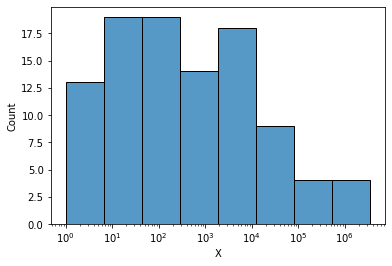

In [55]:
sns.histplot(data=new_df.iloc[0:100],x='X', log_scale=True)#, x="MGnify 'Taxa abundance' column sums")#, binwidth=3)

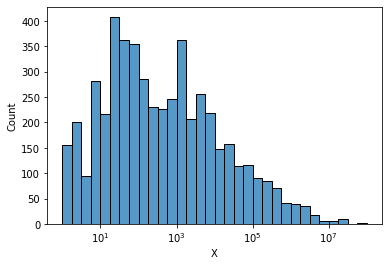

In [60]:
histplot = sns.histplot(data=new_df,x='X', log_scale=True)
fig = histplot.get_figure()
fig.savefig("histplot.png")
histplot